## Online news popularity analysis

### Abstract:
The dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The analysis is done on them to find out which feature/attribute contribute maximum in the popularity and predict the popularity of future news articles in advance before they are published online.

The dataset is obtained from : _[Online news Popularity Data set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)_

### Goal:
Predict the popularity of an online article i.e the maximum no of shares

### Data set Information:
- Characteristics: Multi-variate
- No. of instances: 39797
- Attribute Characteristics: Integer, Real
- No. of attributes: 61
- Machine learning models: Prediction models

### Attribute information:
- 58 predictive attributes
- 2 non-predictive attributes (URL , timedelta)
- 1 goal field - Shares

In [8]:
#import libraries
import numpy as np
import pandas as pd
import csv
import datetime as dt
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#read csv
df = pd.read_csv("OnlineNewsPopularity.csv",delimiter=',',skipinitialspace=True)

In [10]:
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [24]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

### Exploratory Data Analysis:
EDA helps us to understand dataset better by visualizing insights from data.

### Title sentiment Polarity:
How does the title of an article affect its shares?

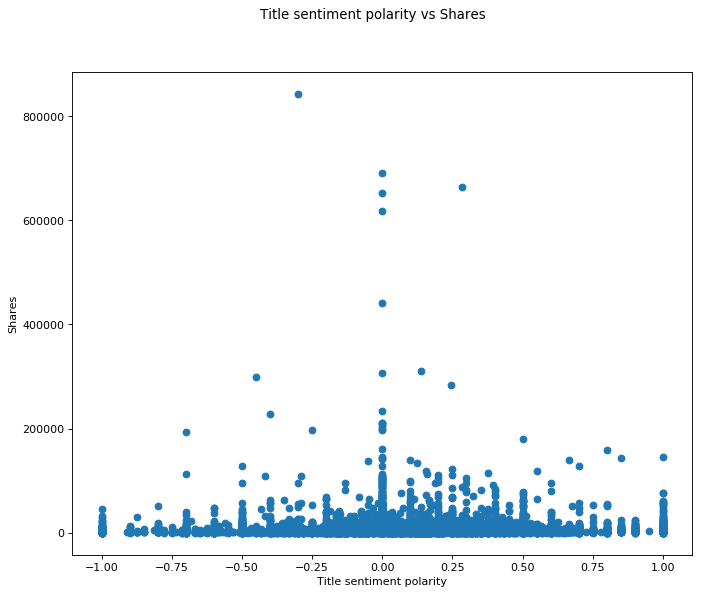

In [14]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
plt.scatter(df['title_sentiment_polarity'],df['shares'])
plt.xlabel("Title sentiment polarity")
plt.ylabel("Shares")
plt.suptitle('Title sentiment polarity vs Shares')
fig.savefig("title_sentiment_polarity.png")
plt.show()

### Result:
Mostly the articles have titles which are not too positive or negative. It lies with in the range of -0.5 to 0.5. However hgihest concentration can be seen in the 0 axis i.e. high no. of articles are neutral in nature.

### Weekday vs weekend:
When are most atricles published?

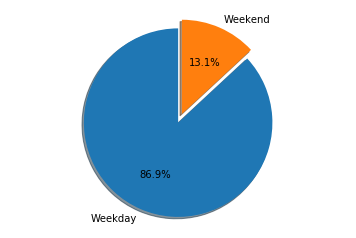

In [12]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Weekday','Weekend'
sizes = [34454,5190] #samples
explode = (0.1, 0)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.savefig("weekend_weekday.png")
plt.show()

### Result:
The above graph shows that most of the articles are be published in Weekdays. However, in order to get more popularity on must publish the article on weekends.

### Distribution of global subjectivity w.r.t shares:

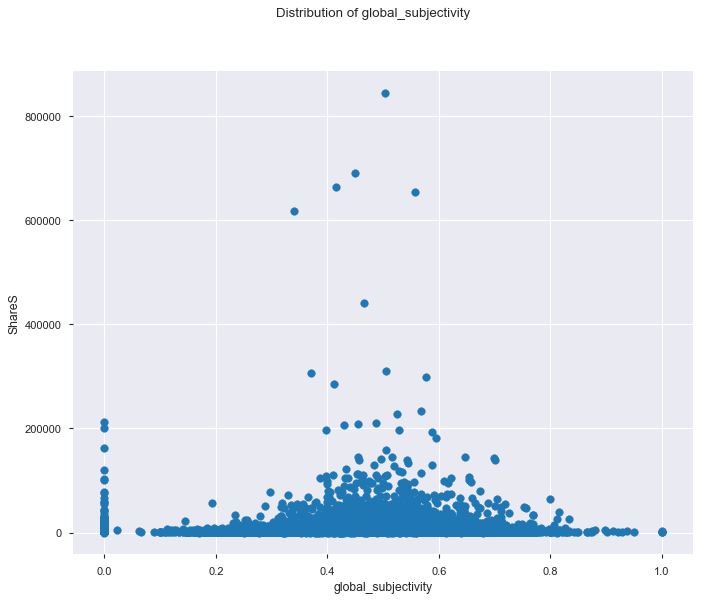

In [51]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
plt.scatter(df['global_subjectivity'],df['shares'])
plt.xlabel('global_subjectivity')
plt.ylabel('ShareS')
plt.suptitle('Distribution of global_subjectivity')
plt.show()
fig.savefig("global_subjectivity.png")

### Result:
Maximum of global_subjectivity lies between 0.2 to 0.8. A significant outlier lies at global_subjectivity of 0.503 with share of 957.Hence, we conclude that most of the articles with medium global_subjectivity are maximum shares.

### Average Positive Polarity:
What is the average positive polarity for articles?

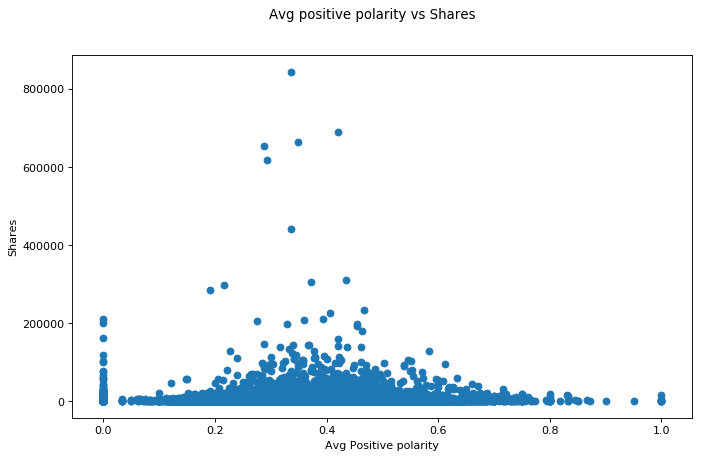

In [18]:
fig=plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
plt.scatter(df['avg_positive_polarity'], df['shares'])
plt.xlabel("Avg Positive polarity")
plt.ylabel("Shares")
plt.suptitle('Avg positive polarity vs Shares')
fig.savefig("avg_positive_polarity.png")
plt.show()

### Result:
Most of the shared articles are slightly to medium positive in polarity.

### Average Negative Polarity:
What is the average negative polarity for articles?

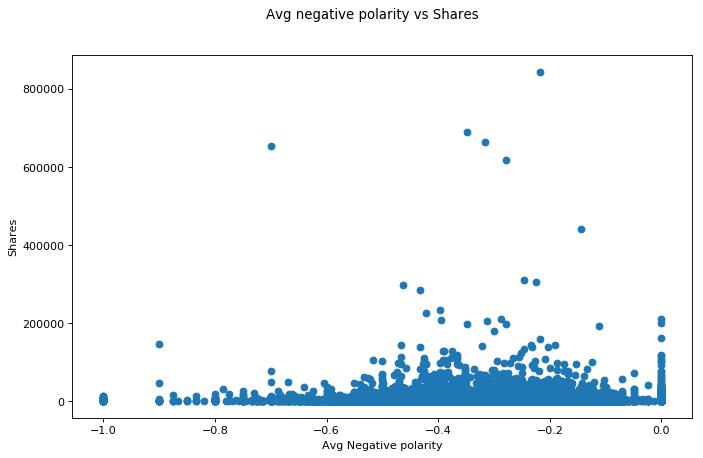

In [13]:
fig=plt.figure(figsize=(10,6), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
plt.scatter(df['avg_negative_polarity'], df['shares'])
plt.xlabel("Avg Negative polarity")
plt.ylabel("Shares")
plt.suptitle('Avg negative polarity vs Shares')
fig.savefig("avg_negative_polarity.png")
plt.show()

### Result:
Most articles shared are slightly negative in nature while some are highly negative.

### The prediction column - Shares:

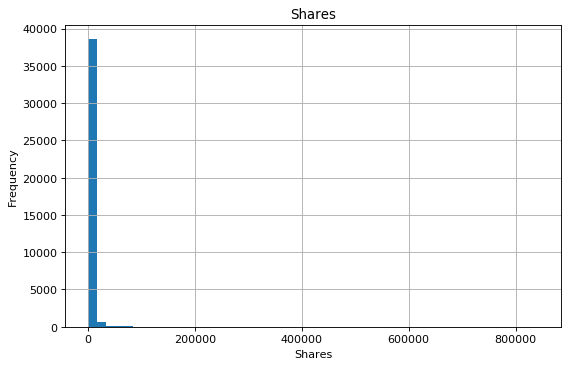

In [7]:
fig = plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
df['shares'].hist(bins=50)
plt.xlabel("Shares")
plt.title("Shares")
plt.ylabel("Frequency")
plt.show()
fig.savefig("Shares.png")

### Conclusions from EDA:
- Few features like kw_max_min, n_unique_tokens,self_reference_min_shares, shares are highly scewed. Hence, we need to normalized these in order to get good prediction
- Almost all features have high percentage of zero values in them
- Mostly news is related to world, technology and business
- News is published more in weekdays than weekends
- Most of the articles are neutral in nature
- Popularity is directly proportional to the number of shares